# ADELINE MAKOKHA
## 191199
### WEEK 1 ASSIGNMENT

Question: Supply Chain Optimization under Demand Uncertainty
Consider Supply Chain Optimization under Demand Uncertainty. Demand for electronic supply in Nairobi in the past two weeks together with their respective probability is given belo
Consider constraints = [supply >= 120, supply <= 330]. Compute the optimal supply.

In [2]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

In [6]:
# Given demand data and probabilities
demand = np.array([255, 302, 270, 317, 285, 332, 300, 347, 315, 362, 330, 262, 309, 277]) #demand
probabilities = np.array([0.03, 0.15, 0.04, 0.1, 0.05, 0.05, 0.09, 0.01, 0.09, 0.03, 0.2, 0.07, 0.05, 0.04]) #probabiities

In [7]:
# Verify probabilities sum to 1
print(f"Sum of probabilities: {np.sum(probabilities)}")

Sum of probabilities: 1.0000000000000002


In [8]:
# Decision variable
supply = cp.Variable()

In [9]:
# Cost function (minimize expected shortage)
# For each scenario, the shortage is max(demand - supply, 0)
shortage = cp.sum(cp.multiply(probabilities, cp.pos(demand - supply)))

In [10]:
# Objective: minimize expected shortage
objective = cp.Minimize(shortage)

In [11]:
# Constraints
constraints = [supply >= 120, supply <= 330]

In [12]:
# Solve problem
problem = cp.Problem(objective, constraints)
problem.solve()

1.2300000000022253

In [13]:
print(f"Optimal supply decision: {supply.value}")
print(f"Expected shortage: {problem.value}")

Optimal supply decision: 329.9999999999923
Expected shortage: 1.2300000000022253


In [14]:
# Calculate expected excess and shortage at optimal solution
expected_excess = np.sum(probabilities * np.maximum(supply.value - demand, 0))
expected_shortage = np.sum(probabilities * np.maximum(demand - supply.value, 0))
print(f"Expected excess inventory: {expected_excess:.2f}")
print(f"Expected shortage: {expected_shortage:.2f}")

Expected excess inventory: 24.38
Expected shortage: 1.23


In [15]:
# Calculate the percentage of demand met on average
demand_met_percentage = np.sum(probabilities * np.minimum(supply.value, demand) / demand) * 100
print(f"Percentage of demand met on average: {demand_met_percentage:.2f}%")

Percentage of demand met on average: 99.66%


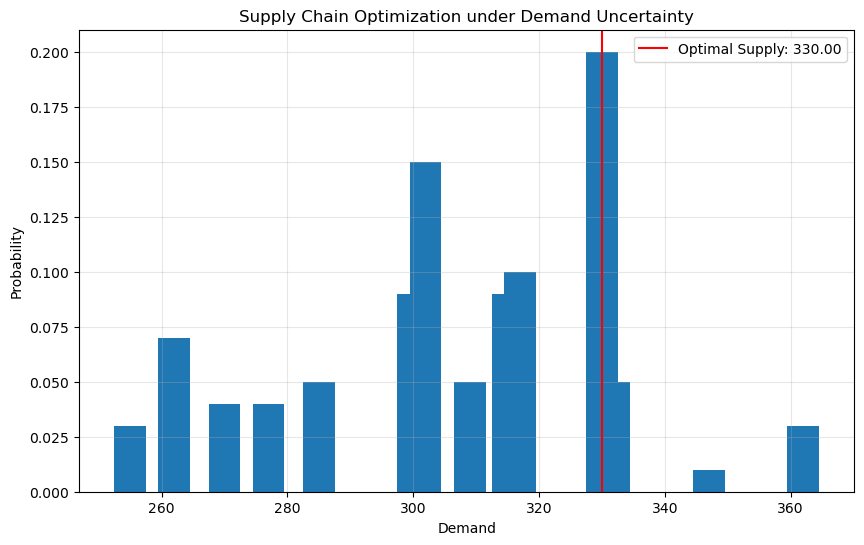

In [16]:
# Visualize the solution
plt.figure(figsize=(10, 6))
plt.bar(demand, probabilities, width=5)
plt.axvline(x=supply.value, color='r', linestyle='-', label=f'Optimal Supply: {supply.value:.2f}')
plt.xlabel('Demand')
plt.ylabel('Probability')
plt.title('Supply Chain Optimization under Demand Uncertainty')
plt.legend()
plt.grid(True, alpha=0.3)


Question 2: Healthcare Resource Allocation with Uncertain Demand
Consider ICU Bed Allocation under Uncertain Patient Arrivals. Number of unscheduled arrivals at Kenyatta National Hospital in the last 10 days has been 25, 20, 30, 50, 27, 39, 42, 29, 35, 42 patients with assigned probabilities 0.1, 0.1, 0.08, 0.15, 0.09, 0.05, 0.1, 0.1, 0.13, 0.1respectively. Consider bed constraints = [beds >= 17, beds <= 55]. Compute the Optimal number of ICU beds allocation.

In [17]:
# Given ICU patient arrival data and probabilities
arrivals = np.array([25, 20, 30, 50, 27, 39, 42, 29, 35, 42])
probabilities = np.array([0.1, 0.1, 0.08, 0.15, 0.09, 0.05, 0.1, 0.1, 0.13, 0.1])


In [18]:
# Verify probabilities sum to 1
print(f"Sum of probabilities: {np.sum(probabilities)}")

Sum of probabilities: 1.0


In [19]:
# Decision variable
beds = cp.Variable()

In [20]:
# Cost function (minimize expected unmet demand)
# For each scenario, the unmet demand is max(arrivals - beds, 0)
unmet_demand = cp.sum(cp.multiply(probabilities, cp.pos(arrivals - beds)))

In [21]:
# Objective: minimize expected unmet demand
objective = cp.Minimize(unmet_demand)

In [22]:
# Constraints
constraints = [beds >= 17, beds <= 55]

In [23]:
# Solve problem
problem = cp.Problem(objective, constraints)
problem.solve()

0.0

In [24]:
print(f"Optimal number of ICU beds: {beds.value}")
print(f"Expected number of patients without beds: {problem.value}")

Optimal number of ICU beds: 50.37049170837931
Expected number of patients without beds: 0.0


In [25]:
# Calculate expected excess beds and unmet demand at optimal solution
expected_excess = np.sum(probabilities * np.maximum(beds.value - arrivals, 0))
expected_unmet = np.sum(probabilities * np.maximum(arrivals - beds.value, 0))
print(f"Expected excess beds: {expected_excess:.2f}")
print(f"Expected unmet demand: {expected_unmet:.2f}")

Expected excess beds: 15.74
Expected unmet demand: 0.00


In [26]:
# Calculate percentage of patient demand met on average
demand_met_percentage = np.sum(probabilities * np.minimum(beds.value, arrivals) / arrivals) * 100
print(f"Percentage of patient demand met on average: {demand_met_percentage:.2f}%")

Percentage of patient demand met on average: 100.00%


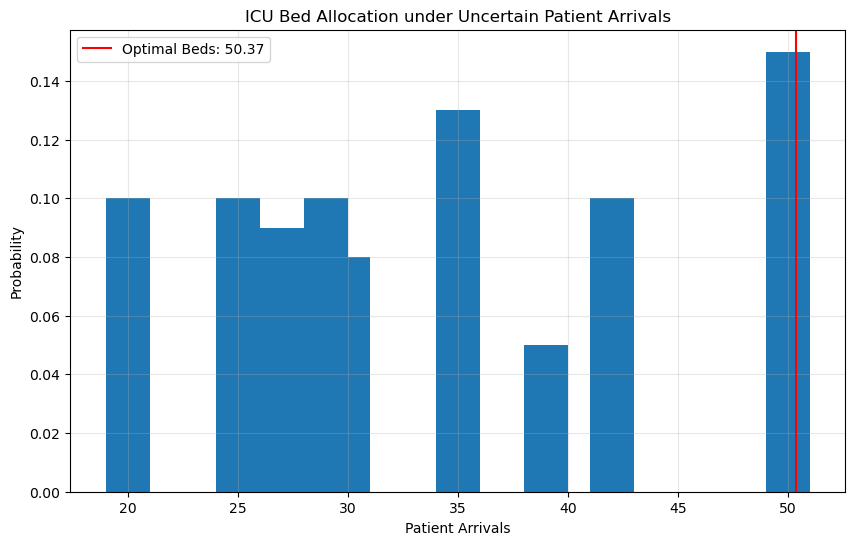

In [27]:
# Visualize the solution
plt.figure(figsize=(10, 6))
plt.bar(arrivals, probabilities, width=2)
plt.axvline(x=beds.value, color='r', linestyle='-', label=f'Optimal Beds: {beds.value:.2f}')
plt.xlabel('Patient Arrivals')
plt.ylabel('Probability')
plt.title('ICU Bed Allocation under Uncertain Patient Arrivals')
plt.legend()
plt.grid(True, alpha=0.3)